In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df= pd.read_excel(r'C:\Users\subha\Downloads\data.xlsx')

In [3]:
df = df.drop('Unnamed: 0',1)
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
#understanding the shape of the data
df.shape

(3998, 38)

In [5]:
#Let's check the no. of unique values in all the columns
print('Unique values:')
for i in df.columns:
    print(i,df[i].nunique())
    print()

Unique values:
ID 3998

Salary 177

DOJ 81

DOL 67

Designation 419

JobCity 339

Gender 2

DOB 1872

10percentage 851

10board 275

12graduation 16

12percentage 801

12board 340

CollegeID 1350

CollegeTier 2

Degree 4

Specialization 46

collegeGPA 1282

CollegeCityID 1350

CollegeCityTier 2

CollegeState 26

GraduationYear 11

English 111

Logical 107

Quant 138

Domain 243

ComputerProgramming 79

ElectronicsAndSemicon 29

ComputerScience 20

MechanicalEngg 42

ElectricalEngg 31

TelecomEngg 26

CivilEngg 23

conscientiousness 141

agreeableness 149

extraversion 154

nueroticism 217

openess_to_experience 142



In [6]:
#Dropping College and college city ID' -- they are same (around 1350 unique id's)
#dropping columns which are unnecessary or may not be known prior to receiving a job offer.
df = df.drop(['ID','CollegeID','CollegeCityID','DOL','Designation','DOJ'],1)

In [7]:
# Changing the data type as required

df['CollegeTier'] = df['CollegeTier'].astype('object')
df['CollegeCityTier'] = df['CollegeCityTier'].astype('object')

In [8]:
# separating all the numerical / date-type features in the data
num_df = df.select_dtypes(exclude='object')
num_df.head()

,Salary,DOB,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,1990-02-19,84.3,2007,95.8,78.00,2011,515,585,525,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,1989-10-04,85.4,2007,85.0,70.06,2012,695,610,780,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,1992-08-03,85.0,2010,68.2,70.00,2014,615,545,370,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,1989-12-05,85.6,2007,83.6,74.64,2011,635,585,625,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,1991-02-27,78.0,2008,76.8,73.90,2012,545,625,465,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
#If a student hasn't opted/attempted an optional test, the same has been mentioned as -1. I will be replacing the
#same with 0.

num_df.loc[:,['Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']]=\
num_df.loc[:,['Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].replace(-1,0)

In [10]:
#on observing the data, some graduation years were mentioned as 0
#Replacing graduation year 0 with the modal graduation year

num_df.loc[num_df['GraduationYear']<1960,'GraduationYear'] = num_df['GraduationYear'].mode()[0]

In [11]:
# separating categorical features
cat_col = df.select_dtypes(include='object')
cat_col.head()

,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState
0,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,0,Andhra Pradesh
1,Indore,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Madhya Pradesh
2,Chennai,f,cbse,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh
3,Gurgaon,m,cbse,cbse,1,B.Tech/B.E.,computer engineering,1,Delhi
4,Manesar,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh


In [12]:
cat_col.describe()

,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,339,2,275,340,2,4,46,2,26
top,Bangalore,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh
freq,627,3041,1395,1400,3701,3700,880,2797,915


In [13]:
#Analysing categorical columns

cat_col['10board'].value_counts(normalize=True)

cbse                          0.348924
state board                   0.291146
0                             0.087544
icse                          0.070285
ssc                           0.030515
                                ...   
hse,orissa                    0.000250
national public school        0.000250
nagpur board                  0.000250
jharkhand academic council    0.000250
bse,odisha                    0.000250
Name: 10board, Length: 275, dtype: float64

In [14]:
board_10 = []
for i in cat_col['10board']:
    if i == 'cbse' or i == 'state board':
        board_10.append(i)
        
    else:
        board_10.append('state board')
        
cat_col['10board'] = board_10

In [15]:
cat_col['10board'].value_counts(normalize=True)

state board    0.651076
cbse           0.348924
Name: 10board, dtype: float64

In [16]:
cat_col['12board'].value_counts(normalize=True)

cbse                                0.350175
state board                         0.313657
0                                   0.089795
icse                                0.032266
up board                            0.021761
                                      ...   
jawahar higher secondary school     0.000250
nagpur board                        0.000250
bsemp                               0.000250
board of higher secondary orissa    0.000250
boardofintermediate                 0.000250
Name: 12board, Length: 340, dtype: float64

In [17]:
board_12 = []
for i in cat_col['12board']:
    if i == 'cbse' or i == 'state board':
        board_12.append(i)
    else:
        board_12.append('state board')
        
cat_col['12board'] = board_12

In [18]:
cat_col['12board'].value_counts(normalize=True)

state board    0.649825
cbse           0.350175
Name: 12board, dtype: float64

In [19]:
cat_col['Degree'].value_counts(normalize=True)

B.Tech/B.E.      0.925463
MCA              0.060780
M.Tech./M.E.     0.013257
M.Sc. (Tech.)    0.000500
Name: Degree, dtype: float64

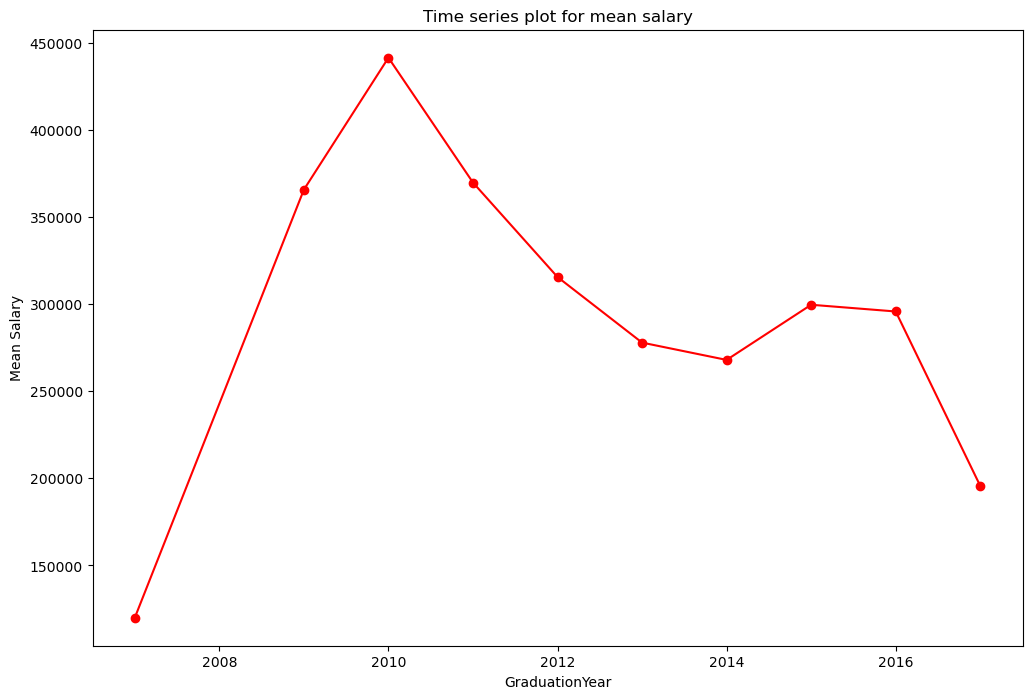

In [20]:
plt.figure(figsize = (12,8))
num_df.groupby('GraduationYear')['Salary'].mean().plot(color='r',marker= 'o')
plt.title('Time series plot for mean salary')
plt.ylabel('Mean Salary')
plt.show()

In [21]:
# rise in entry level average salaries of students till 2010. since 2010 there has been a sharp decline in the average salary every year uptil 2014. The salaries increases again from 2014 to 2015. A sharp decline again between 2016 and 2017

In [22]:
#Feature Extraction
num_df['Birth Year'] = pd.to_datetime(num_df['DOB']).dt.year
num_df.drop('DOB',1,inplace=True)

In [23]:
num_df['Grad Age'] = num_df['GraduationYear'] - num_df['Birth Year']
num_df['GradAge_12th'] = num_df['12graduation'] - num_df['Birth Year']
num_df.drop(['12graduation','Birth Year','GraduationYear'],axis=1,inplace=True)

In [24]:
clean_df = pd.concat([cat_col,num_df],1)
clean_df.head()

,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState,Salary,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Grad Age,GradAge_12th
0,Bangalore,f,state board,state board,2,B.Tech/B.E.,computer engineering,0,Andhra Pradesh,420000,...,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,21,17
1,Indore,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Madhya Pradesh,500000,...,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,23,18
2,Chennai,f,cbse,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh,325000,...,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,22,18
3,Gurgaon,m,cbse,cbse,1,B.Tech/B.E.,computer engineering,1,Delhi,1100000,...,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,22,18
4,Manesar,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh,200000,...,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,21,17


In [25]:
#checking collge GPA since some students have entered a score out of 100, while others have added a score out of 10
#new_df['collegeGPA'].describe()

In [26]:
#converting the CGPA's out of 10 to % scale
clean_df.loc[clean_df['collegeGPA'] <= 10,'collegeGPA']= \
(clean_df.loc[clean_df['collegeGPA'] <= 10,'collegeGPA']/10)*100

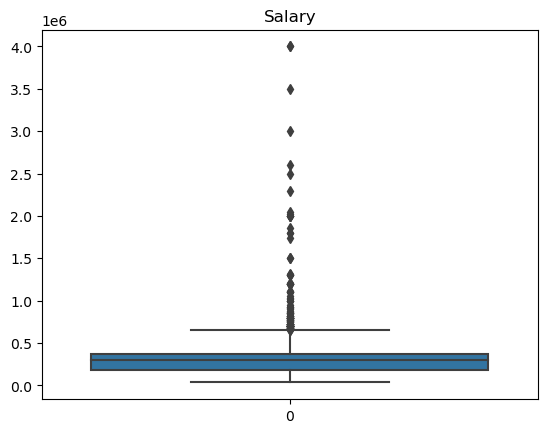

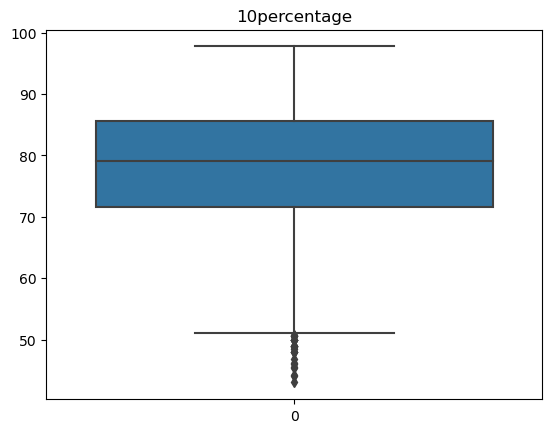

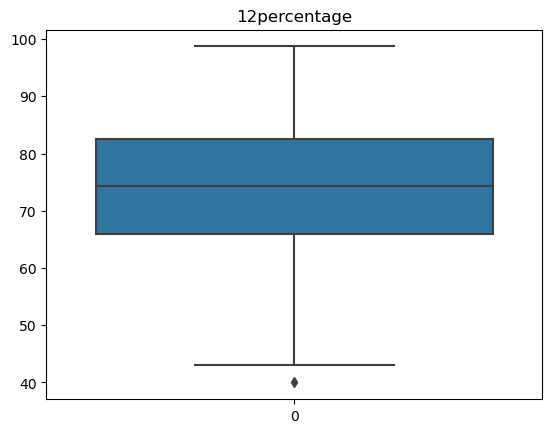

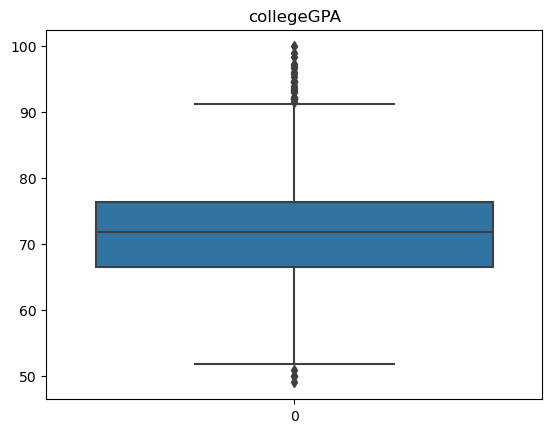

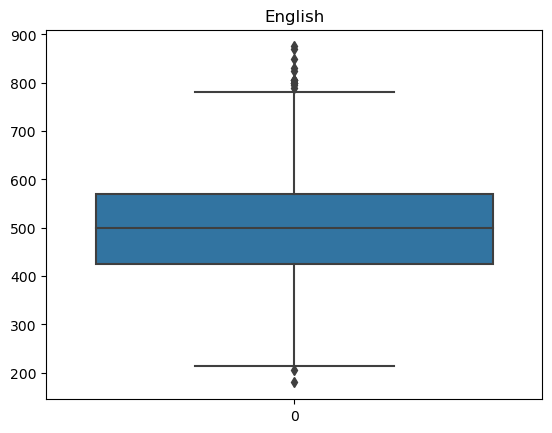

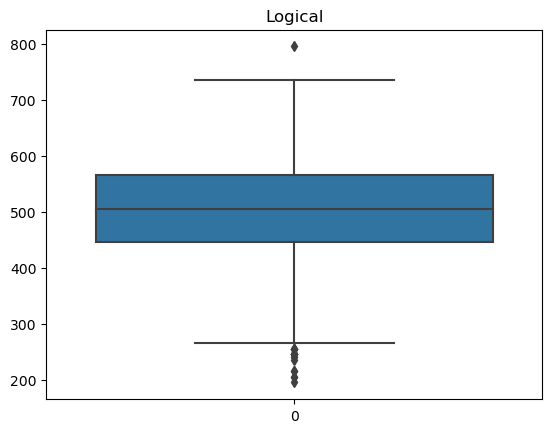

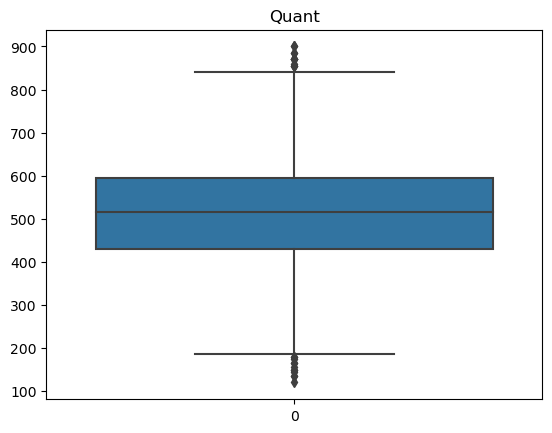

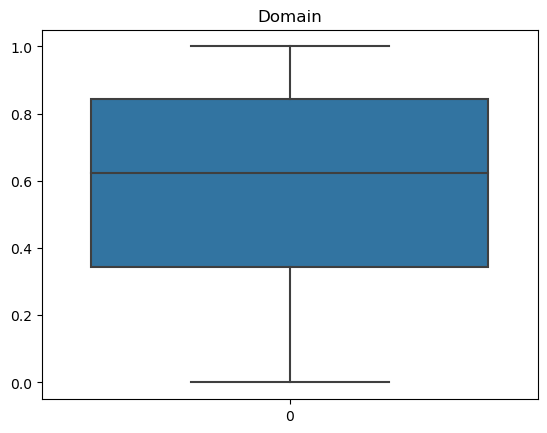

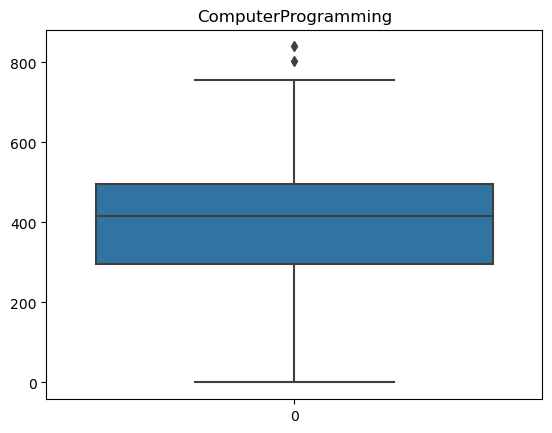

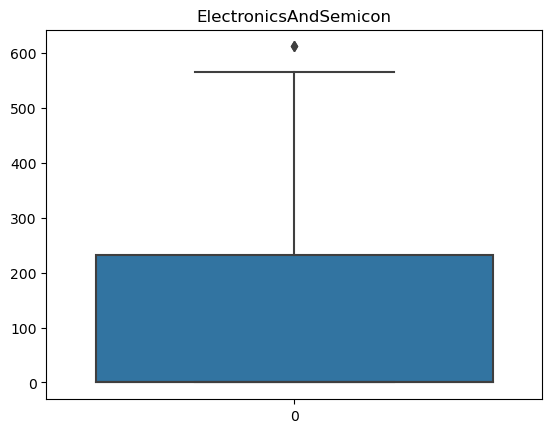

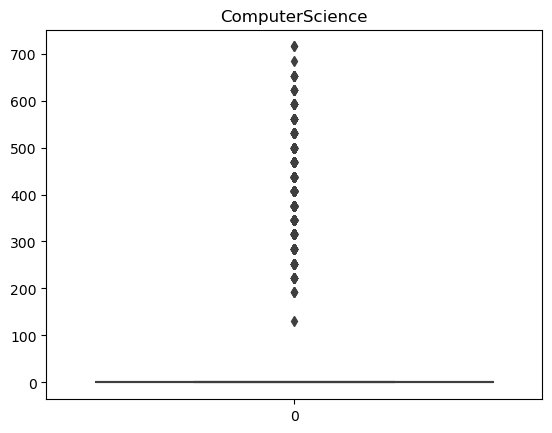

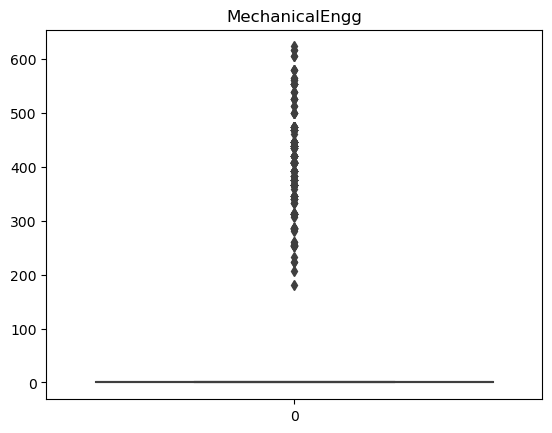

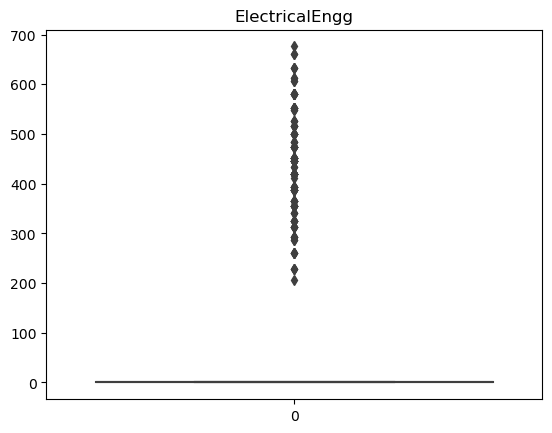

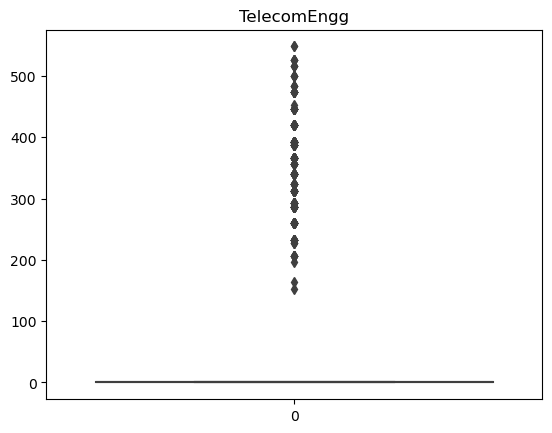

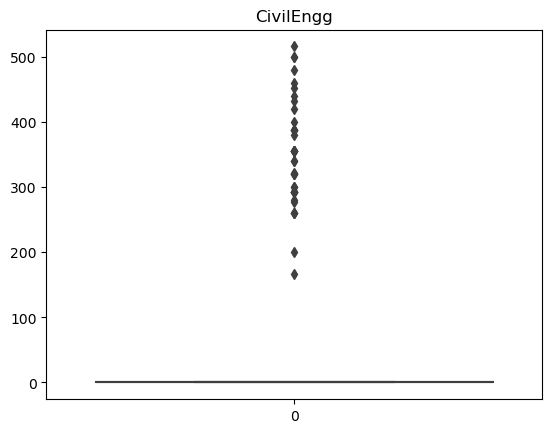

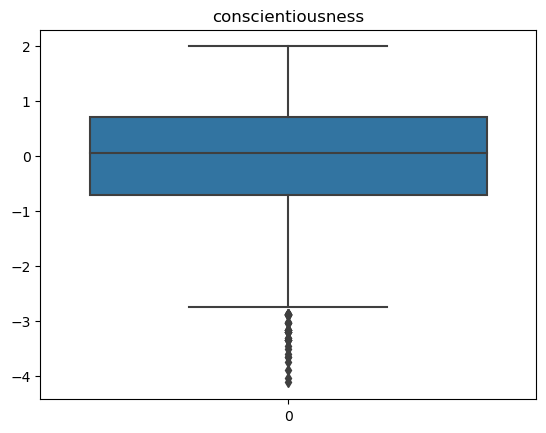

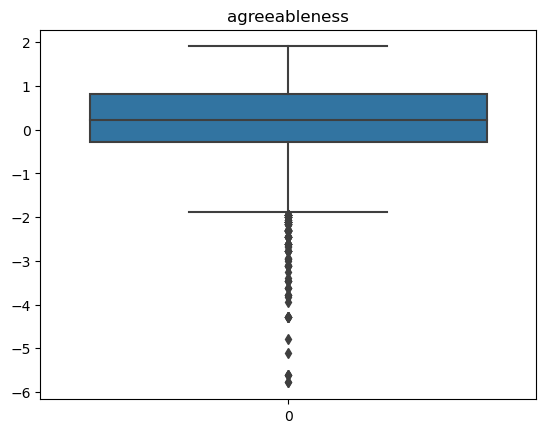

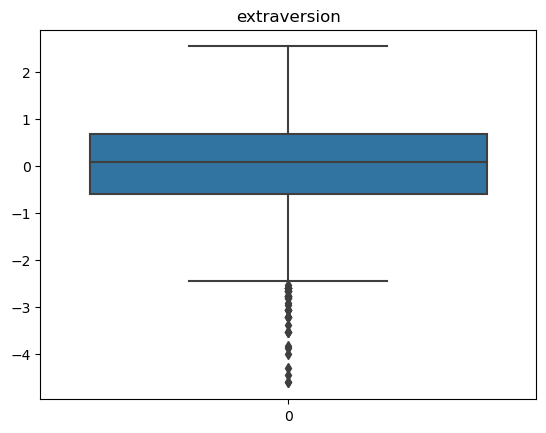

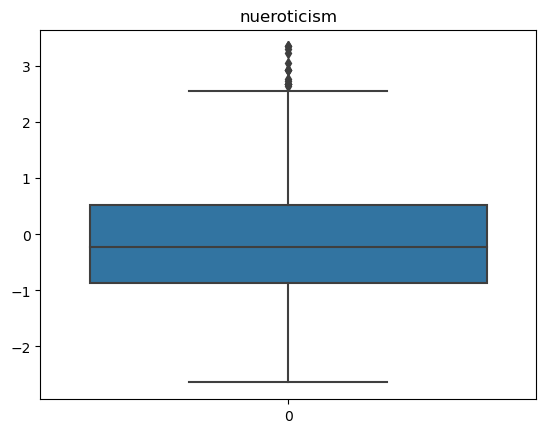

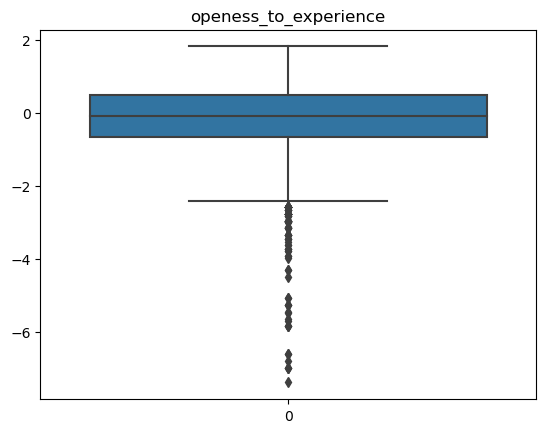

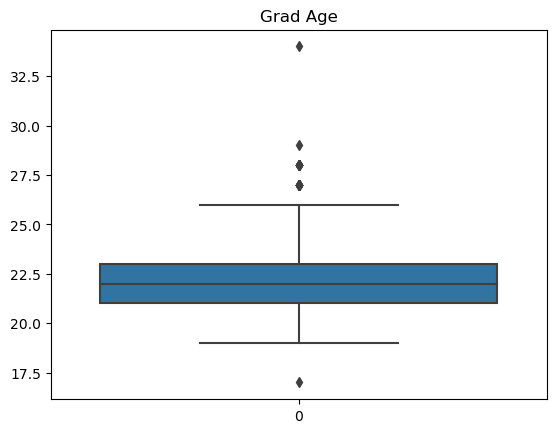

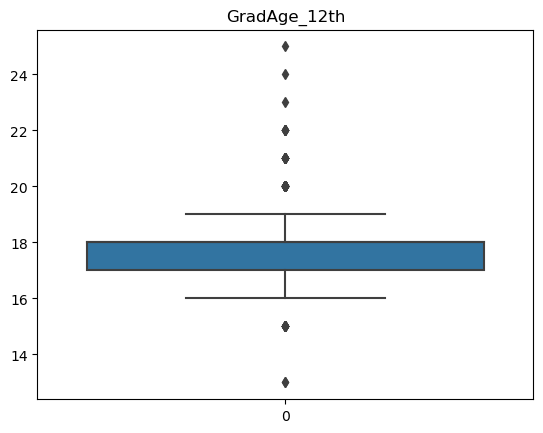

In [27]:
# outlier Analysis 

for i in num_df.columns:
    sns.boxplot(clean_df[i])
    plt.title(i)
    plt.show()

In [28]:
# These columns are optional subject columns, and if the subject has not been opted, the same has been replaced with
# 0. Therefore, I am not considering such columns for outlier analysis since all the points other than 0 will be
# considered as an outlier
cols_for_outlier = clean_df[num_df.columns].columns.drop(['ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])

In [29]:
q1 = clean_df[cols_for_outlier].quantile(0.25)
q3 = clean_df[cols_for_outlier].quantile(0.75)
iqr = q3-q1
ub= q3 + 1.5*iqr
lb = q1 - 1.5*iqr

new_df = clean_df[~((clean_df[cols_for_outlier] < lb) | (clean_df[cols_for_outlier] > ub)).any(axis=1)]
# Very neglegible decrease in the number of records
# Removing outliers except in the following columns 
#'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg',
#'TelecomEngg', 'CivilEngg'
#since skew is merely because of absence of that test (which has been replaced with 0 value)


In [30]:
new_df.shape

(3477, 31)

In [31]:
# Storing category and numerical column names in separte variables
cats = cat_col.columns
nums = num_df.columns

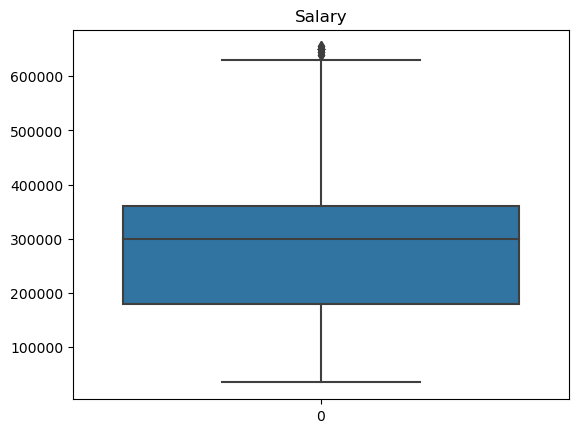

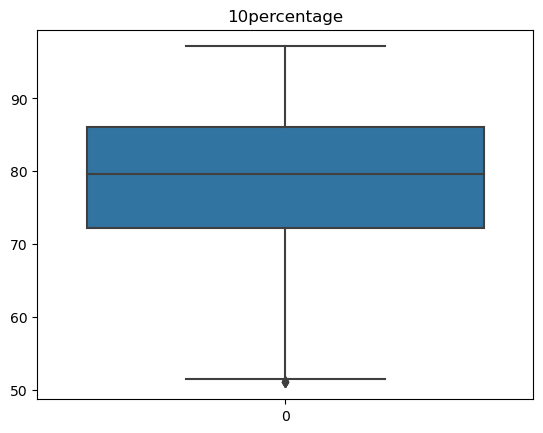

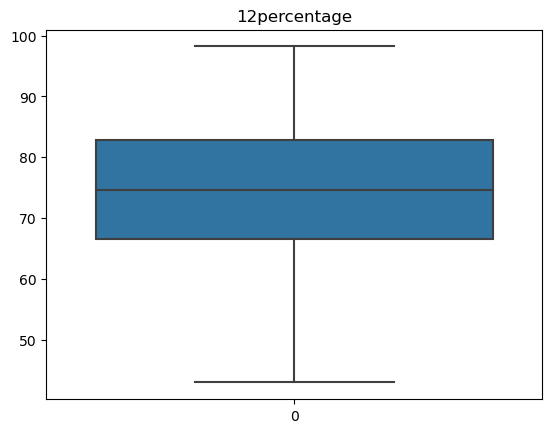

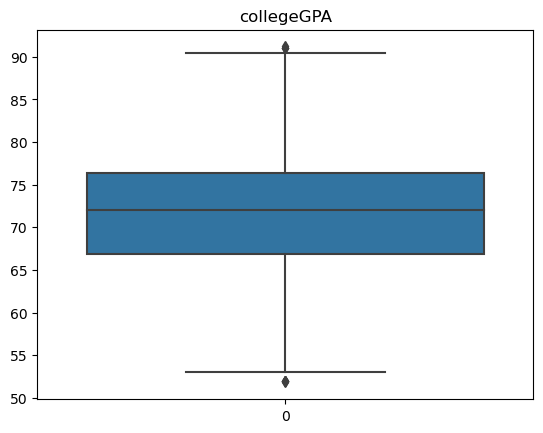

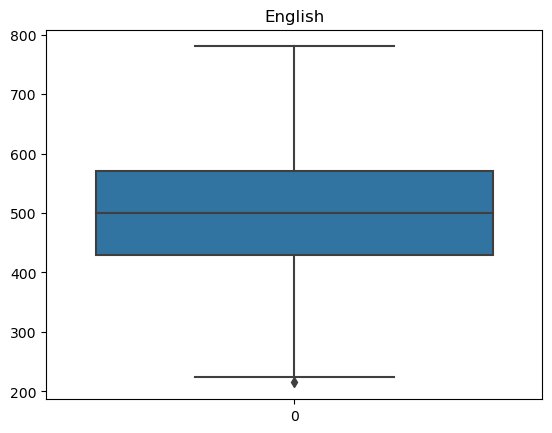

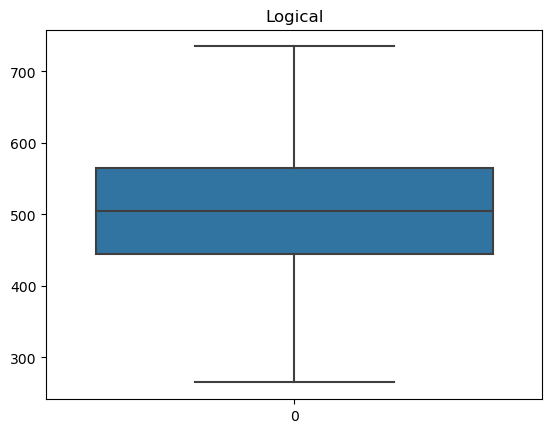

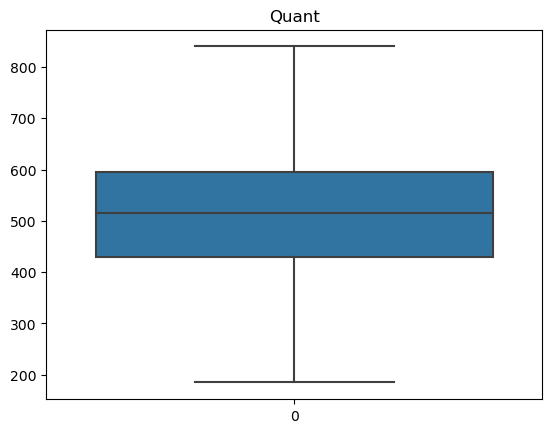

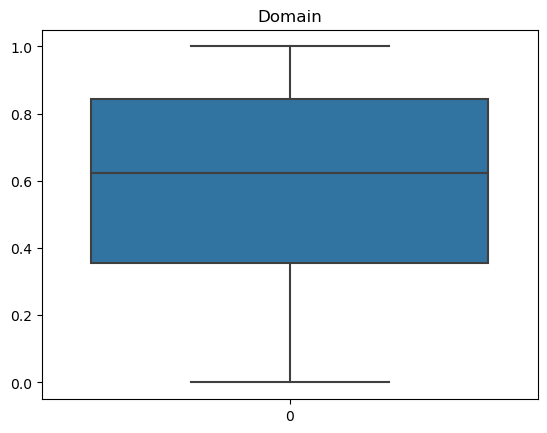

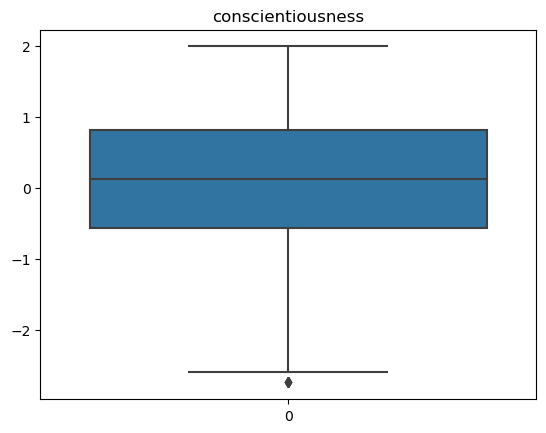

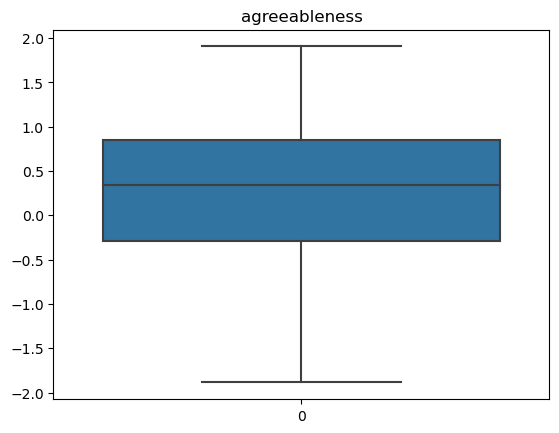

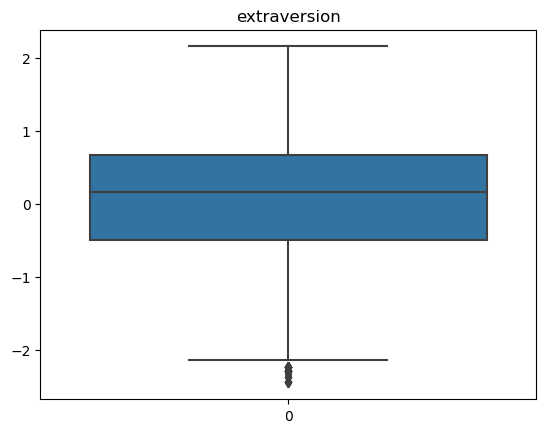

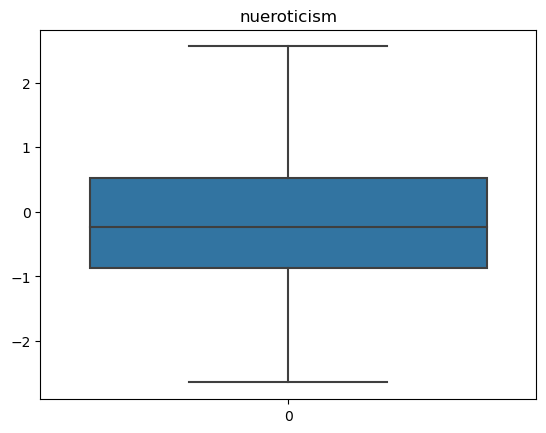

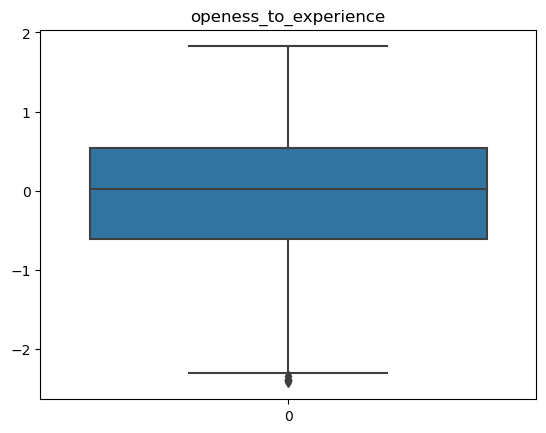

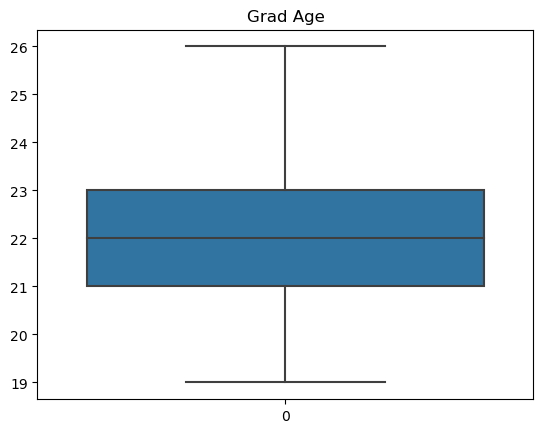

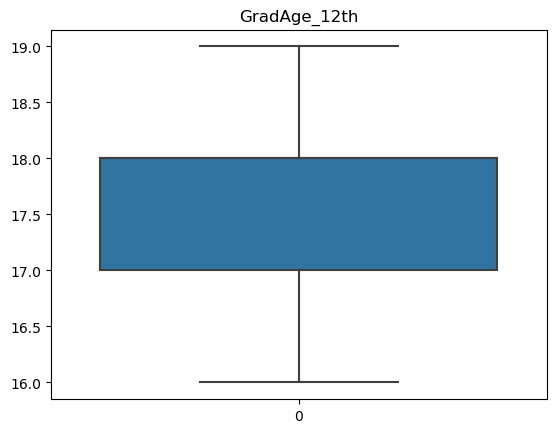

In [32]:
#checking the distribution post outlier analysis
for i in cols_for_outlier:
    sns.boxplot(new_df[i])
    plt.title(i)
    plt.show()

In [33]:
nums

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Grad Age', 'GradAge_12th'],
      dtype='object')

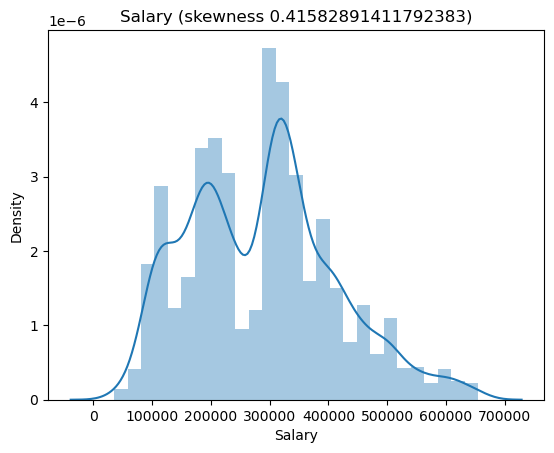

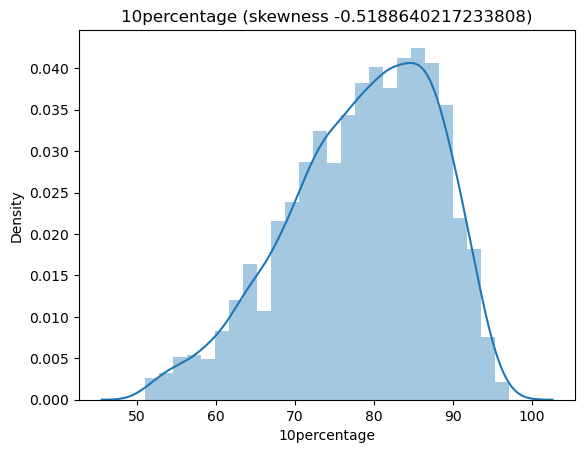

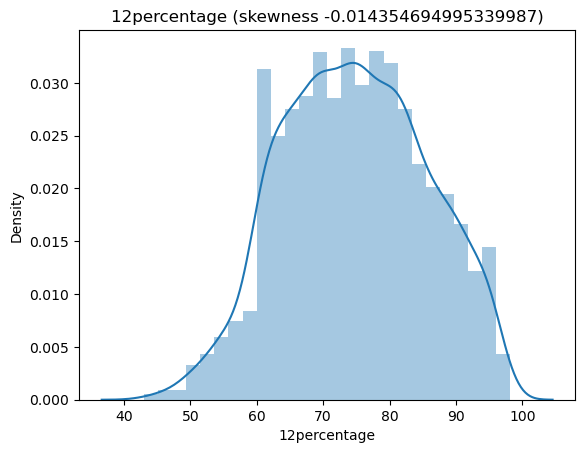

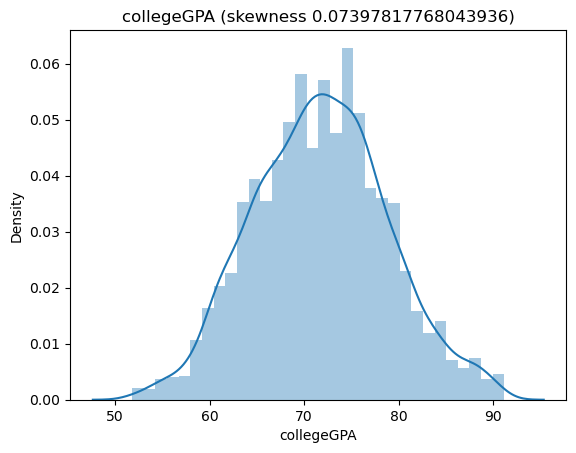

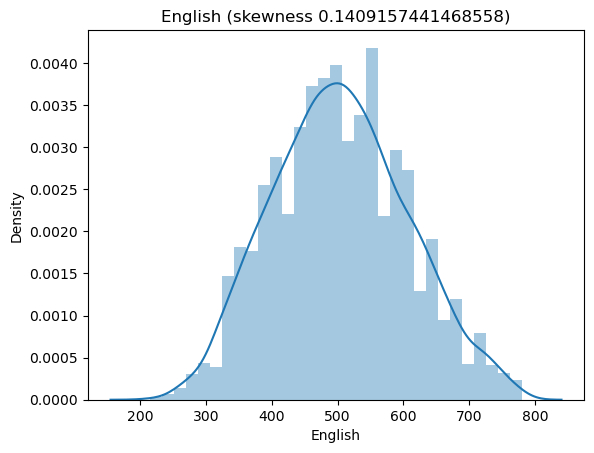

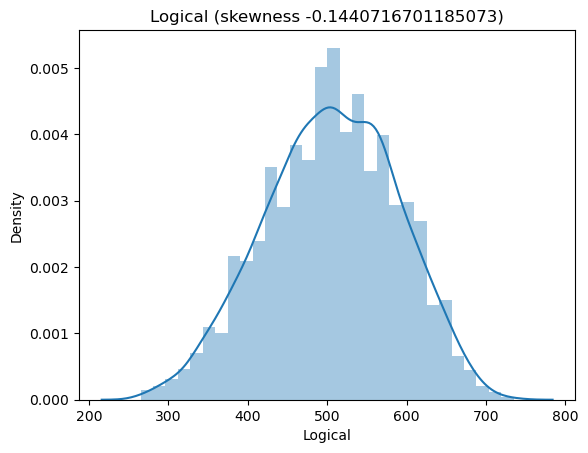

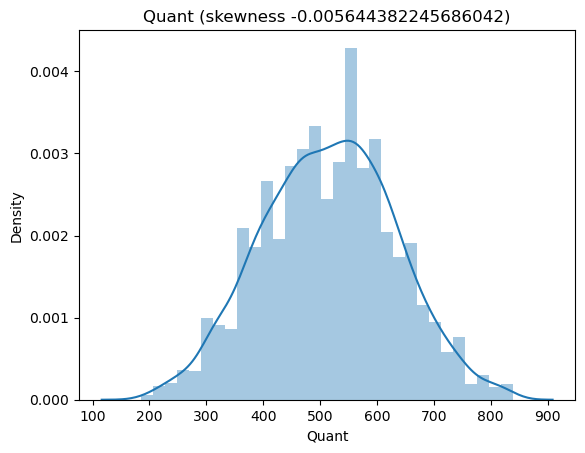

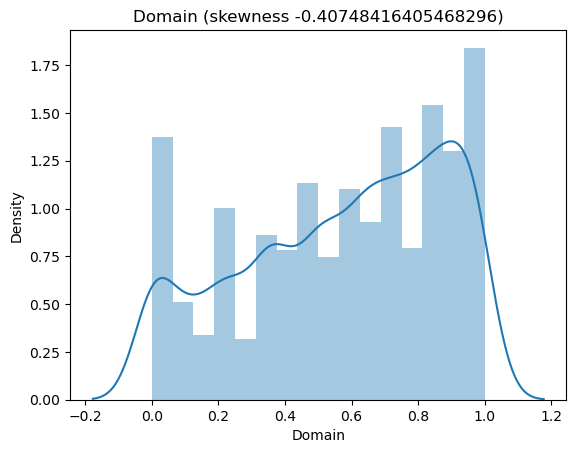

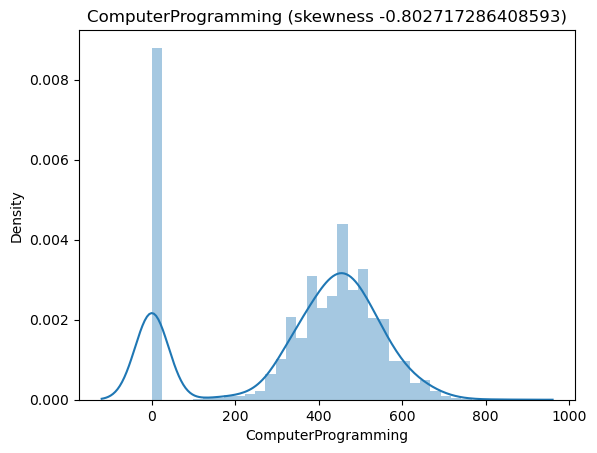

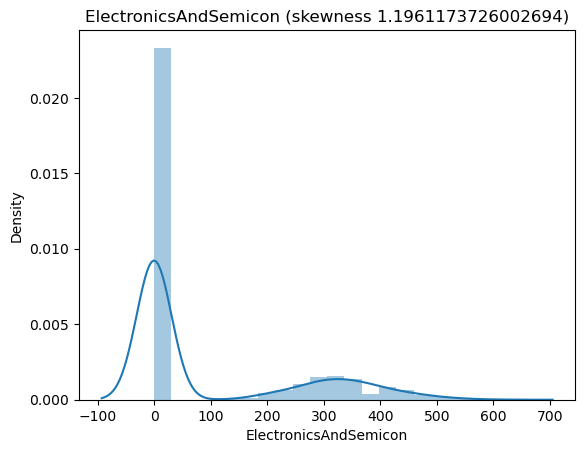

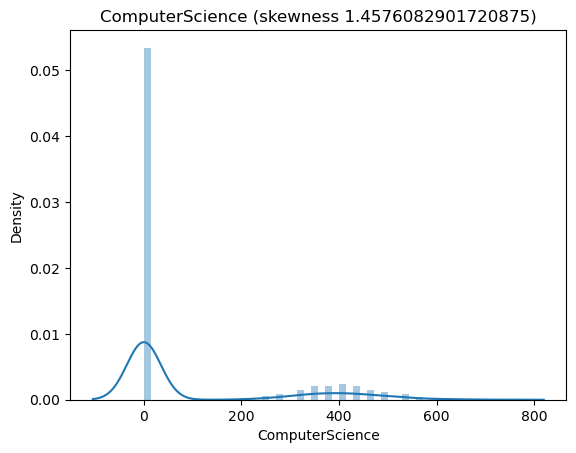

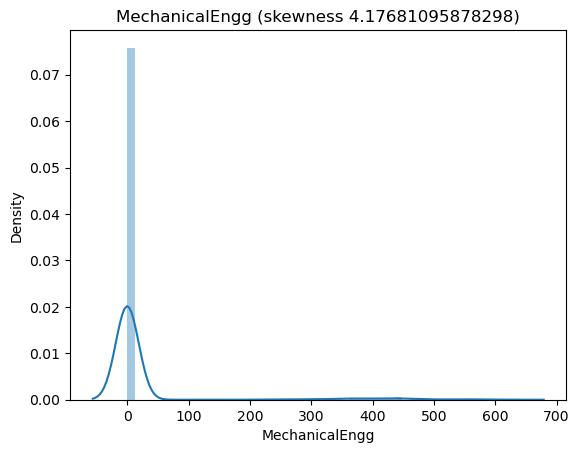

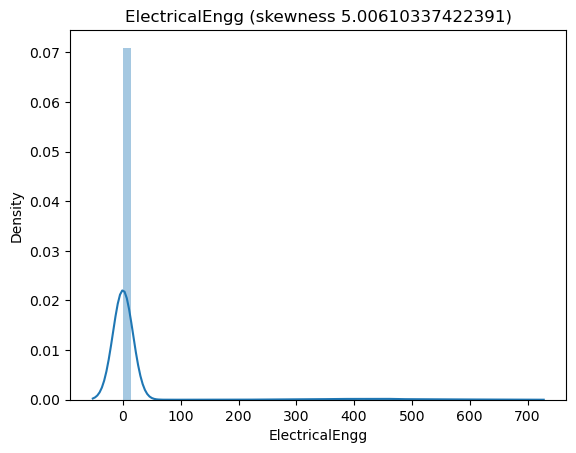

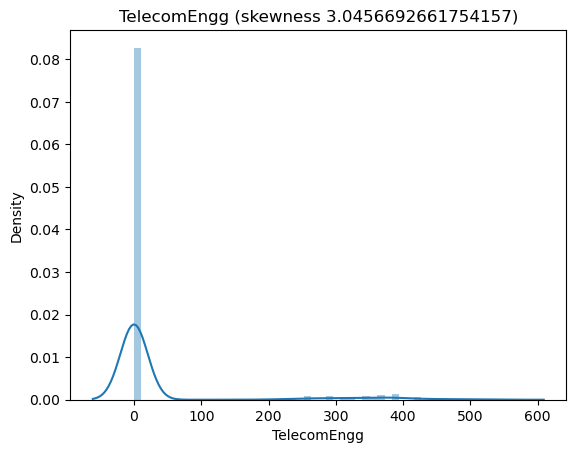

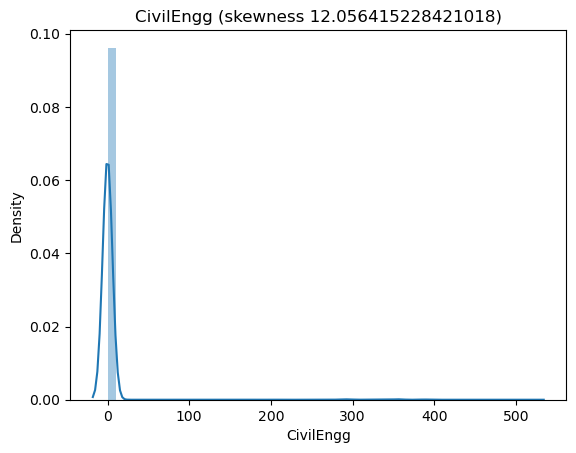

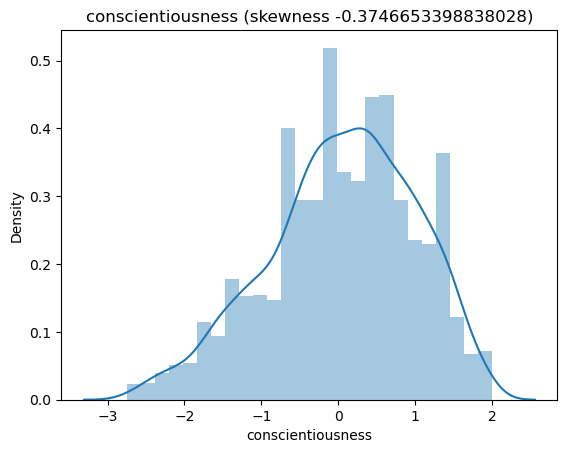

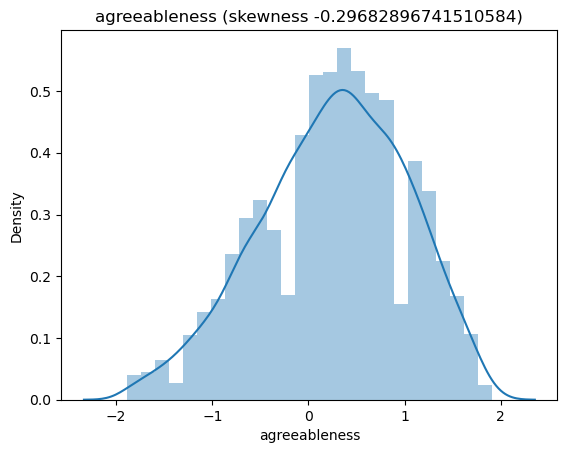

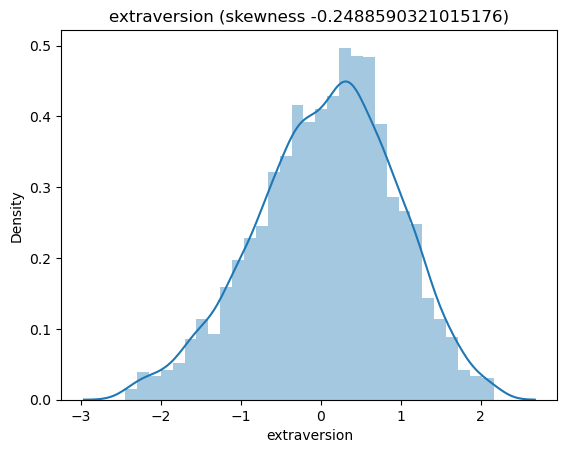

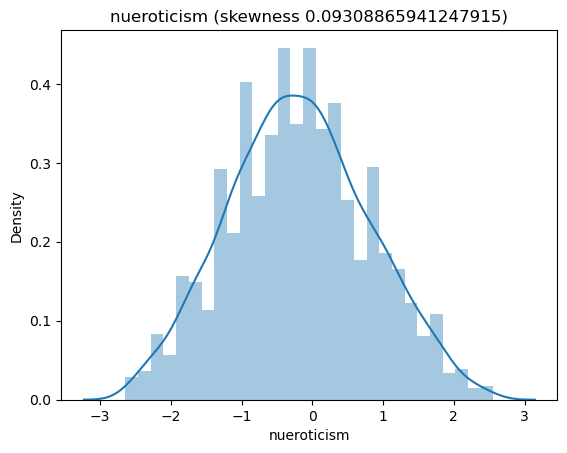

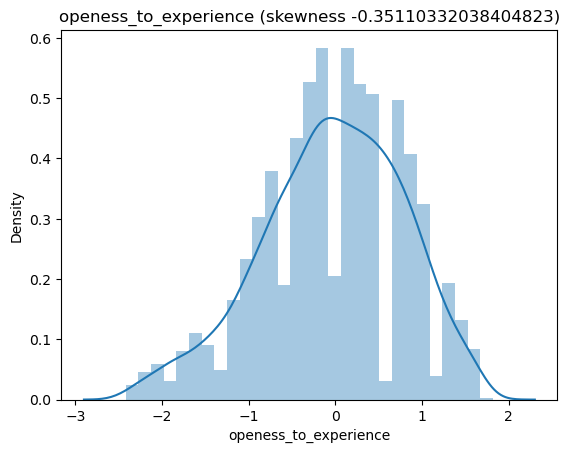

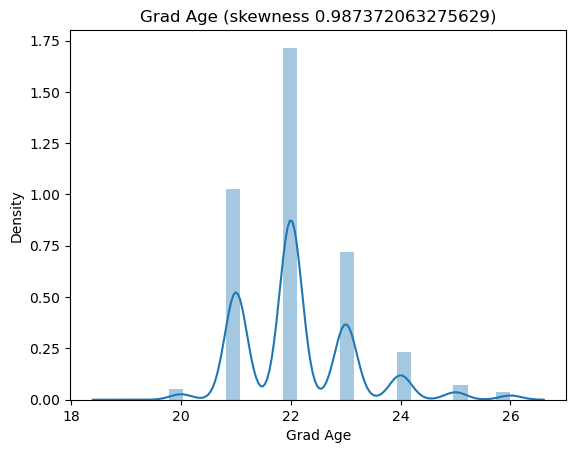

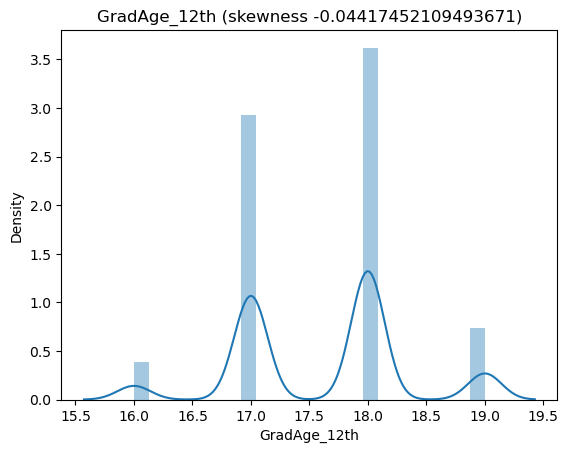

In [34]:
# checking the shape of numeric data

for i in nums:
    try:
        sns.distplot(new_df[i])
        plt.title('{} (skewness {})'.format(i,new_df[i].skew()))
        plt.show()
        
    except:
        pass

In [35]:
import plotly.graph_objects as go

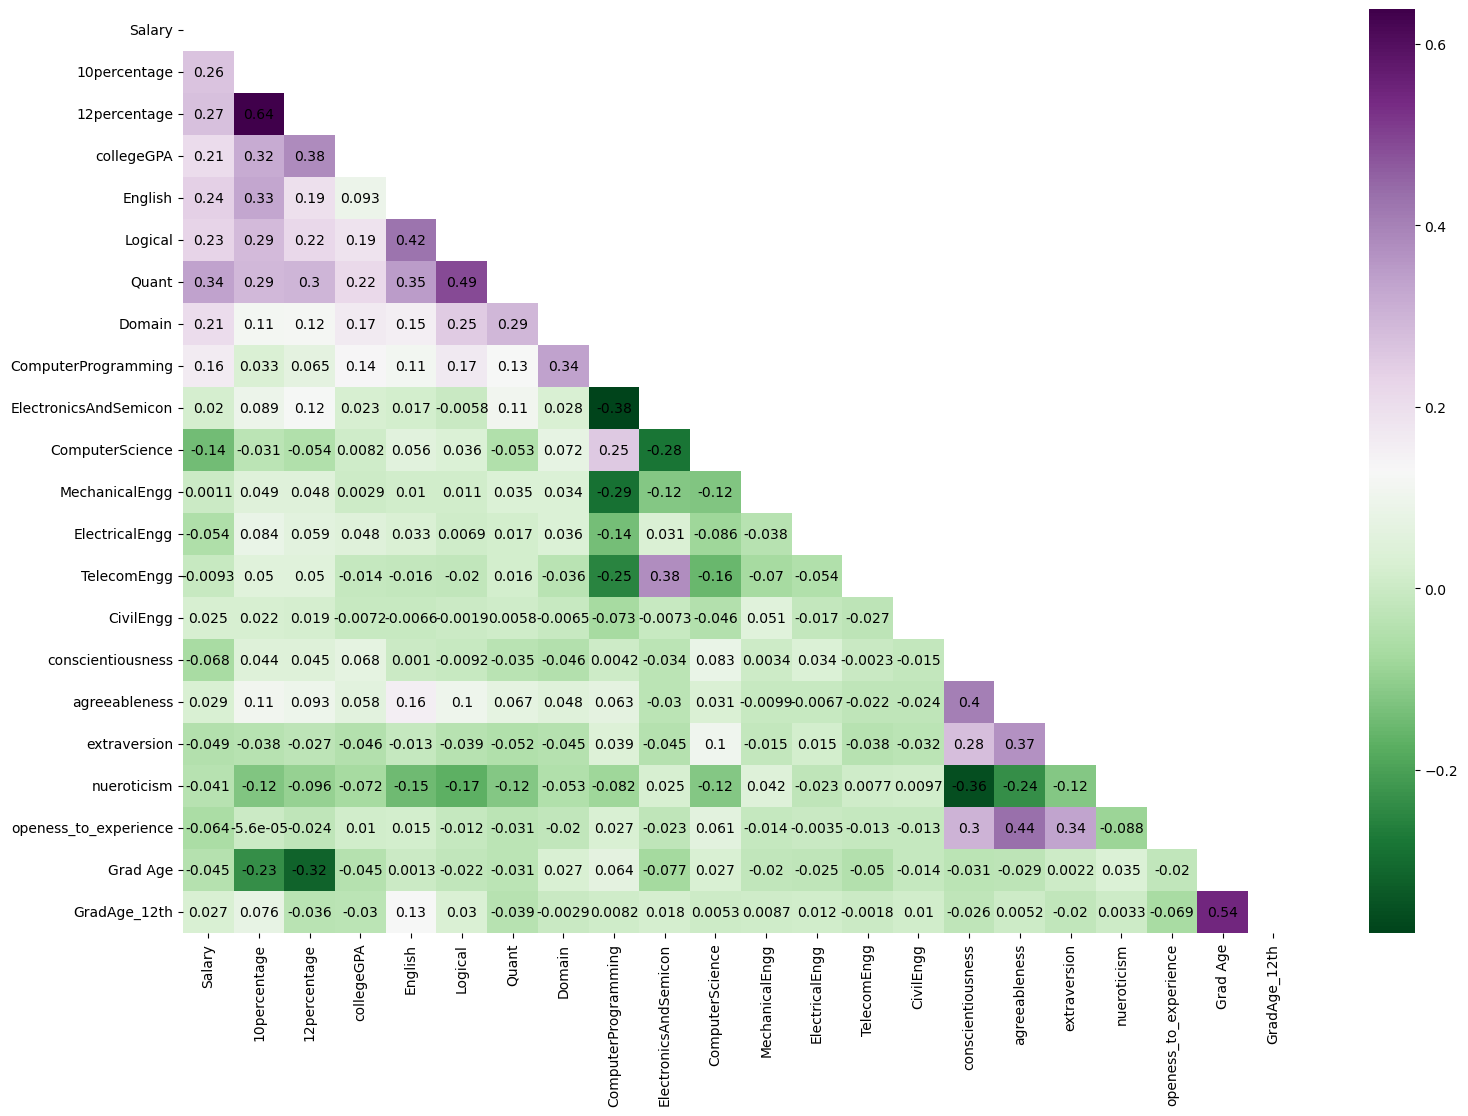

In [41]:
#let's check the correlation heatmap for understanding the degree of linear relationship

mask = np.zeros_like(new_df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

plt.figure(figsize=(18,12))
sns.heatmap(new_df.corr(),annot=True,annot_kws={'color':'black'},cmap='PRGn_r',mask=mask)
plt.show()

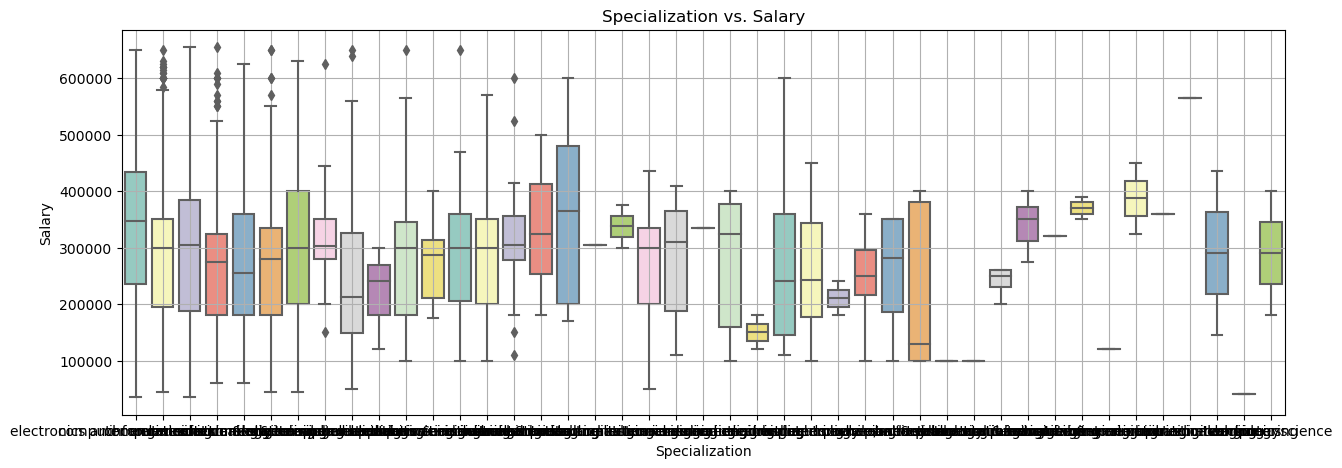

In [44]:
plt.figure(figsize=(15, 5))
plt.title('Specialization vs. Salary')
sns.boxplot(x='Specialization', y='Salary', data=new_df, palette='Set3')
plt.grid(True)
plt.show()


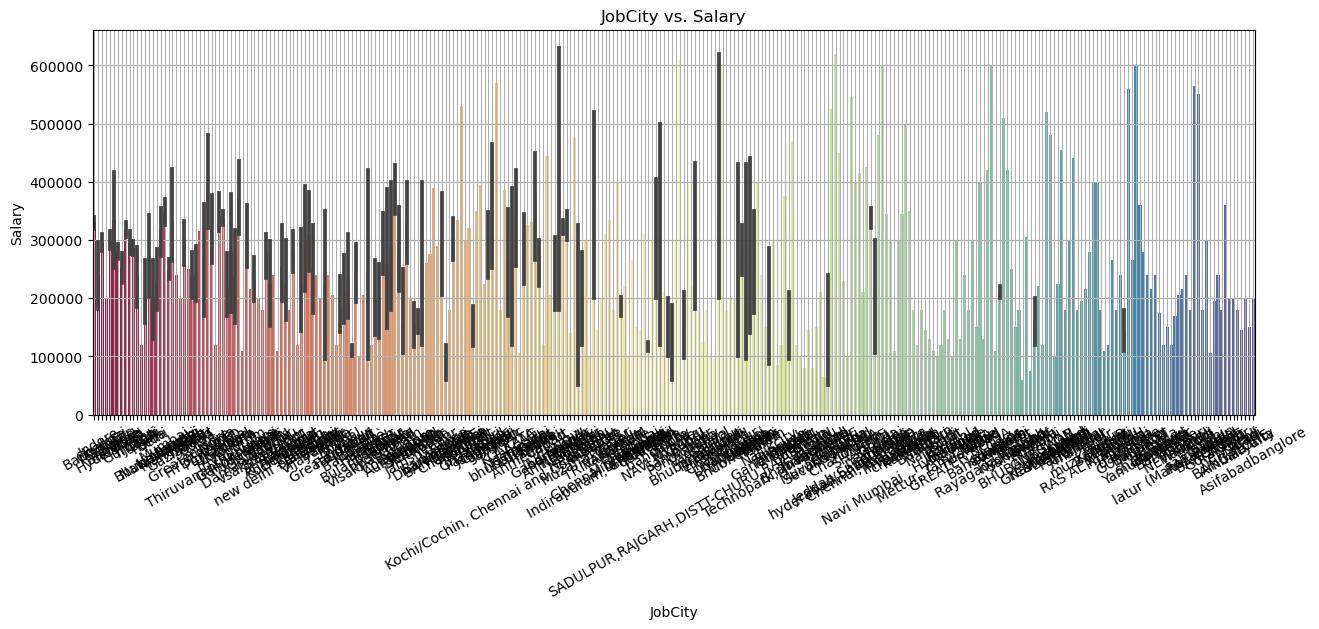

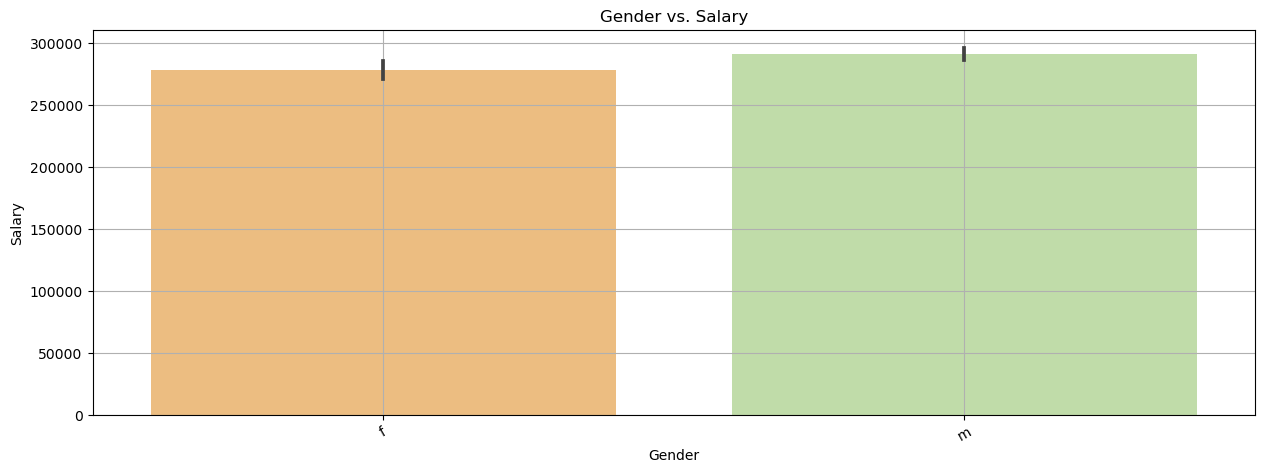

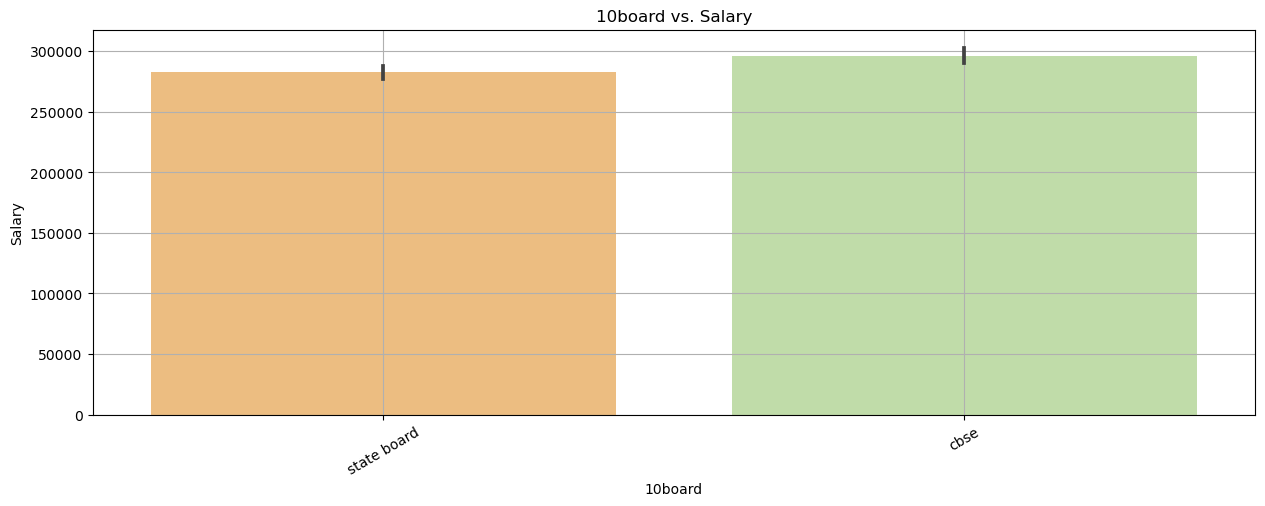

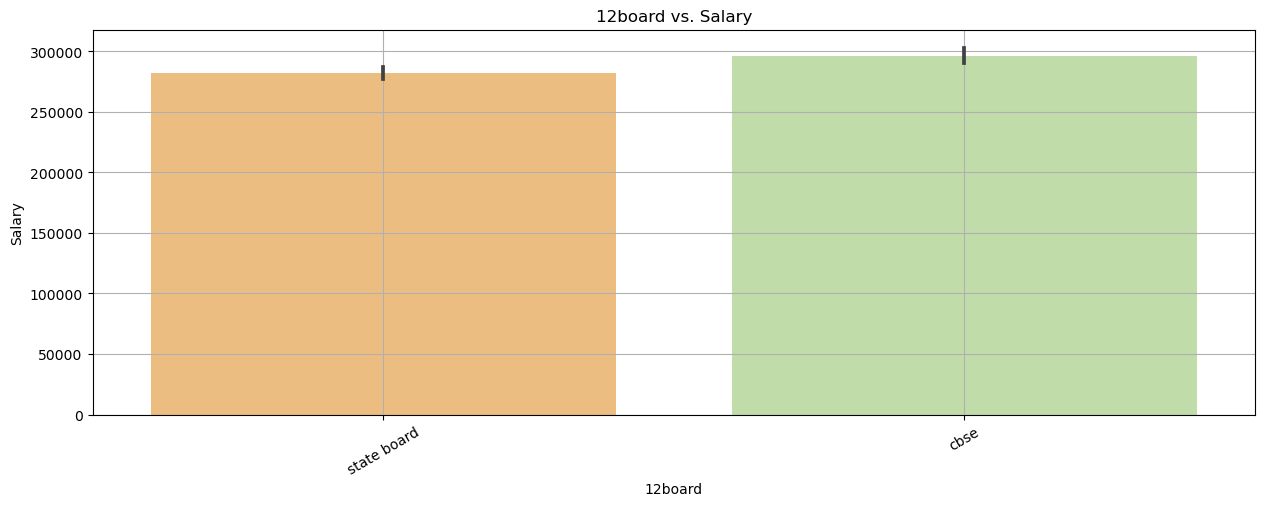

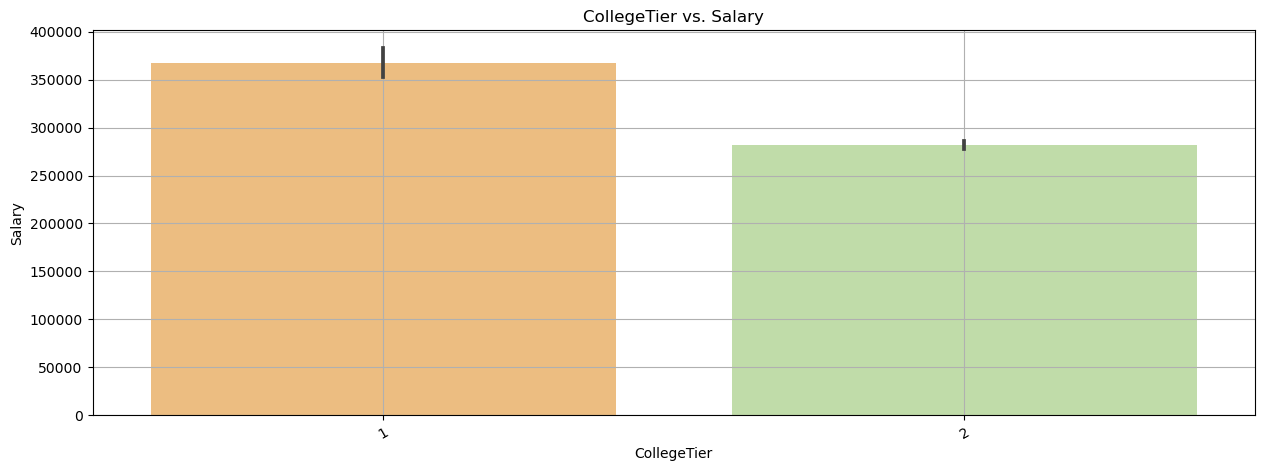

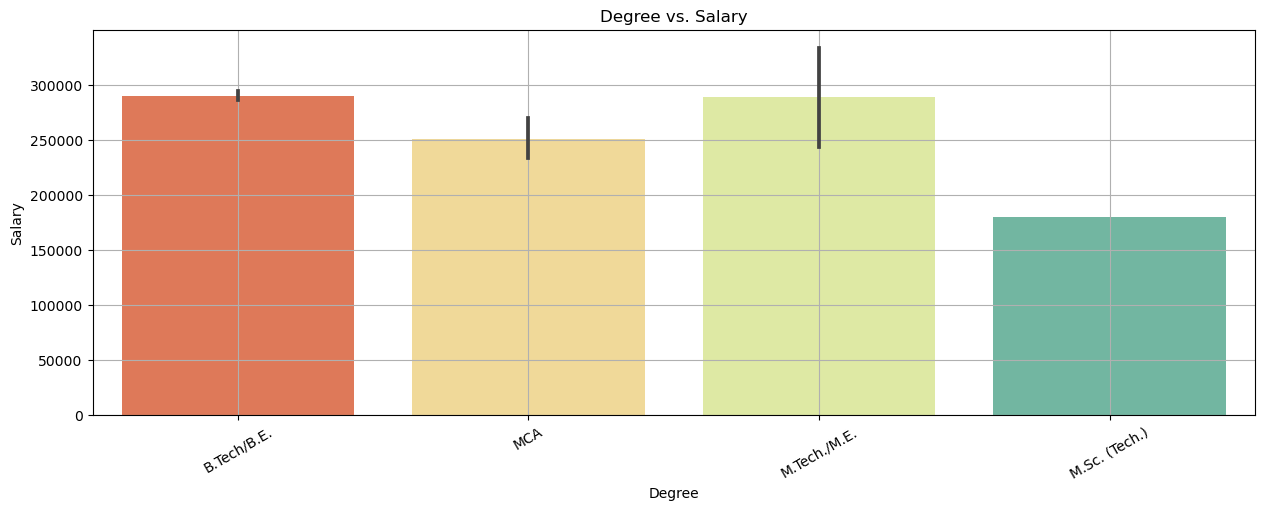

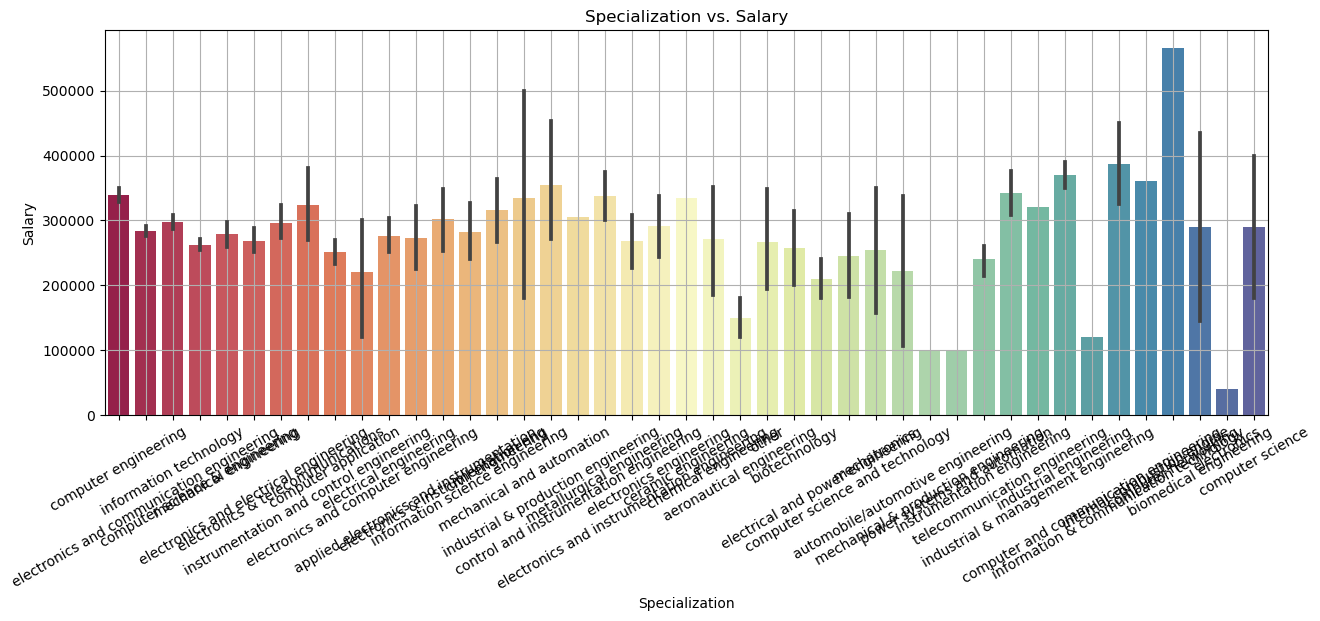

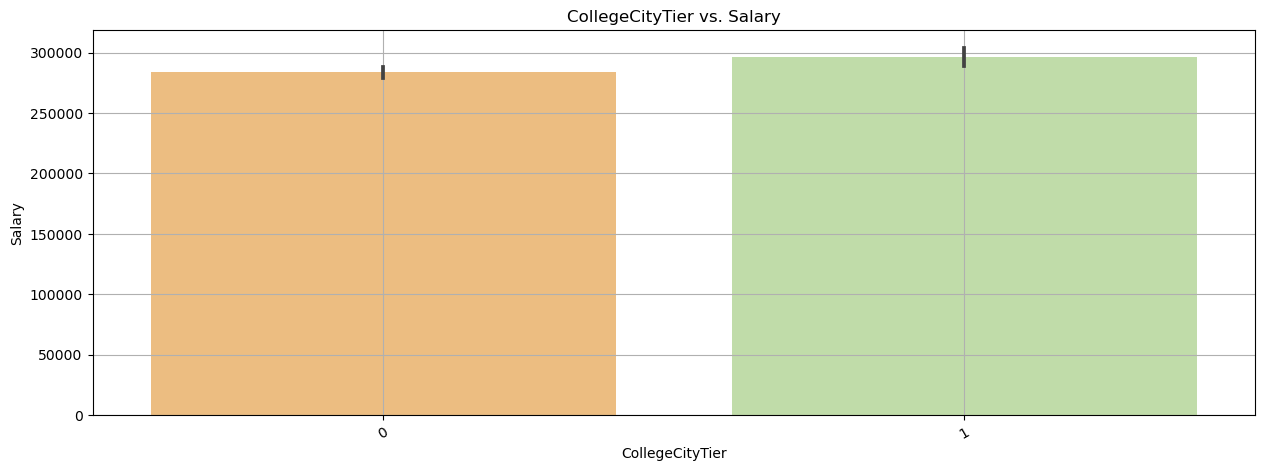

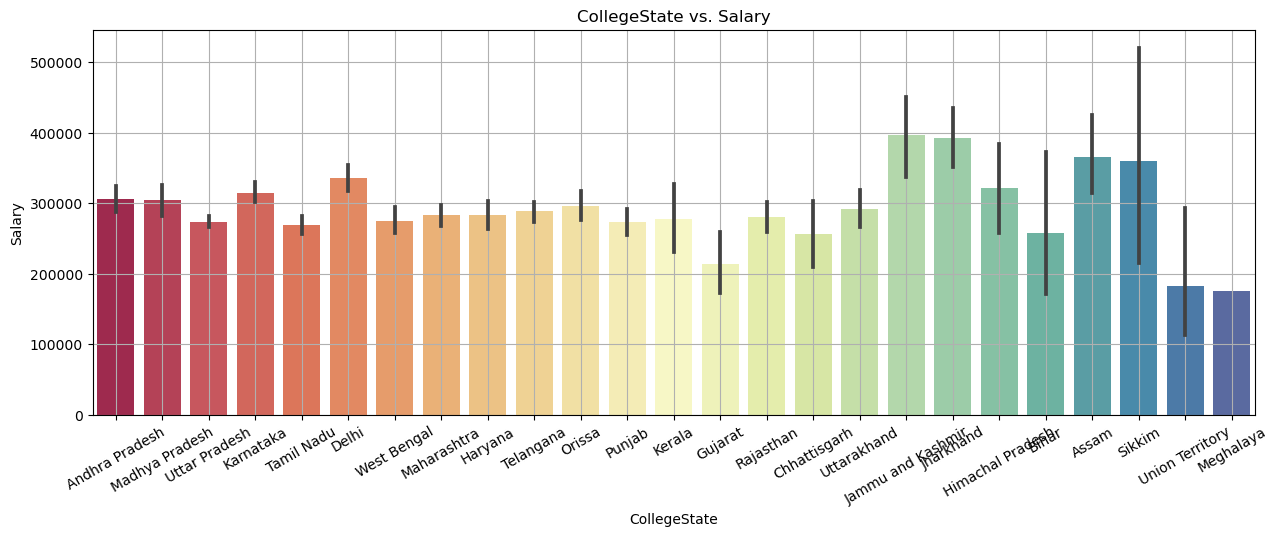

In [45]:
#Analysing Target variable with categorical features
for i in cats:
    plt.figure(figsize=(15, 5))
    plt.title(f'{i} vs. Salary')  # f-string for cleaner formatting
    sns.barplot(x=i, y='Salary', data=new_df, palette='Spectral')
    plt.xticks(rotation=30)  # Rotates the x-axis labels for better readability
    plt.grid(True)
    plt.show()
